In [396]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.utils import shuffle
import tensorflow as tf
import keras
from keras.models import Model, Sequential
from keras.layers import Input, Dense, Dropout
from keras.activations import relu, softmax, sigmoid
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.cluster import DBSCAN
from imblearn.over_sampling import RandomOverSampler
import json
import numpy as np


In [397]:
os.chdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/InvoiceDateDataset")
datasetDir = os.listdir("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/InvoiceDateDataset")

In [398]:
dfs = []
for file in datasetDir:
    df = pd.read_csv(file)
    dfs.append(df)
data = pd.concat(dfs)
data.drop(columns=["Unnamed: 0.1", "Unnamed: 0", "text", "Similarity", "Class"], inplace=True)
data

,x1,y1,x2,y2,invoice,invoice_X,invoice_Y,pitstop,pitstop_X,pitstop_Y,...,mre_X,mre_Y,offi,offi_X,offi_Y,CandidatePosition,NeighbourText,NeighbourX,NeighbourY,Output
0,0.132269,0.230242,0.203820,0.244355,0.000000,0.000000,0.000000,-0.005783,0.082668,0.091734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.264534,-0.014922,-0.121061,-0.011986,0
1,0.136830,0.254032,0.208381,0.268145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.276369,-0.014920,-0.121088,-0.011880,0
2,0.890821,0.277823,0.962372,0.291935,-0.038794,0.104475,0.000403,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.619586,-0.001480,-0.109864,-0.011817,1
3,0.136830,0.254032,0.208381,0.268145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.276369,-0.014920,-0.121088,-0.011880,0
4,0.890821,0.277823,0.962372,0.291935,-0.038794,0.104475,0.000403,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.619586,-0.001480,-0.109864,-0.011817,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.235649,0.373962,0.287024,0.399738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.260819,-0.006628,-0.104638,0.007134,1
0,0.744252,0.060217,0.817265,0.069064,-0.038794,0.188584,0.022546,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.603649,0.000472,-0.066817,-0.006951,1
0,0.485691,0.086684,0.503426,0.093242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.238035,-0.014695,-0.120251,-0.011753,0
1,0.296252,0.160251,0.366385,0.169376,-0.038794,0.235389,0.000570,0.000000,0.000000,0.000000,...,0.219468,0.066581,0.020392,0.168480,0.059453,0.013881,0.005529,-0.090107,-0.012536,1


In [399]:
data.drop_duplicates(keep="first", inplace=True)
data

,x1,y1,x2,y2,invoice,invoice_X,invoice_Y,pitstop,pitstop_X,pitstop_Y,...,mre_X,mre_Y,offi,offi_X,offi_Y,CandidatePosition,NeighbourText,NeighbourX,NeighbourY,Output
0,0.132269,0.230242,0.203820,0.244355,0.000000,0.000000,0.000000,-0.005783,0.082668,0.091734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.264534,-0.014922,-0.121061,-0.011986,0
1,0.136830,0.254032,0.208381,0.268145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.276369,-0.014920,-0.121088,-0.011880,0
2,0.890821,0.277823,0.962372,0.291935,-0.038794,0.104475,0.000403,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.619586,-0.001480,-0.109864,-0.011817,1
0,0.687843,0.070776,0.754510,0.079909,-0.038794,0.230980,0.019406,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.523615,0.015493,-0.094508,-0.008663,1
1,0.535686,0.127854,0.602353,0.136416,-0.038794,0.078824,0.076199,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.297865,0.037121,0.024789,0.015647,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,0.235649,0.373962,0.287024,0.399738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.260819,-0.006628,-0.104638,0.007134,1
0,0.744252,0.060217,0.817265,0.069064,-0.038794,0.188584,0.022546,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.603649,0.000472,-0.066817,-0.006951,1
0,0.485691,0.086684,0.503426,0.093242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.238035,-0.014695,-0.120251,-0.011753,0
1,0.296252,0.160251,0.366385,0.169376,-0.038794,0.235389,0.000570,0.000000,0.000000,0.000000,...,0.219468,0.066581,0.020392,0.168480,0.059453,0.013881,0.005529,-0.090107,-0.012536,1


In [400]:
data.reset_index(inplace=True)
data.drop(columns=["index"], inplace=True)
data

/tmp/ipykernel_6371/1143817850.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  data.reset_index(inplace=True)


,x1,y1,x2,y2,invoice,invoice_X,invoice_Y,pitstop,pitstop_X,pitstop_Y,...,mre_X,mre_Y,offi,offi_X,offi_Y,CandidatePosition,NeighbourText,NeighbourX,NeighbourY,Output
0,0.132269,0.230242,0.203820,0.244355,0.000000,0.000000,0.000000,-0.005783,0.082668,0.091734,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.264534,-0.014922,-0.121061,-0.011986,0
1,0.136830,0.254032,0.208381,0.268145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.276369,-0.014920,-0.121088,-0.011880,0
2,0.890821,0.277823,0.962372,0.291935,-0.038794,0.104475,0.000403,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.619586,-0.001480,-0.109864,-0.011817,1
3,0.687843,0.070776,0.754510,0.079909,-0.038794,0.230980,0.019406,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.523615,0.015493,-0.094508,-0.008663,1
4,0.535686,0.127854,0.602353,0.136416,-0.038794,0.078824,0.076199,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.297865,0.037121,0.024789,0.015647,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,0.235649,0.373962,0.287024,0.399738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.260819,-0.006628,-0.104638,0.007134,1
337,0.744252,0.060217,0.817265,0.069064,-0.038794,0.188584,0.022546,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.603649,0.000472,-0.066817,-0.006951,1
338,0.485691,0.086684,0.503426,0.093242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-0.238035,-0.014695,-0.120251,-0.011753,0
339,0.296252,0.160251,0.366385,0.169376,-0.038794,0.235389,0.000570,0.000000,0.000000,0.000000,...,0.219468,0.066581,0.020392,0.168480,0.059453,0.013881,0.005529,-0.090107,-0.012536,1


In [401]:
data.isna().sum().sum()

0

In [402]:
data["Output"] = pd.to_numeric(data["Output"], errors='coerce')

In [403]:
data.drop(columns=["CandidatePosition", "NeighbourText", "NeighbourX", "NeighbourY"], inplace=True)

In [404]:
file = open("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Data/Models/wordEmbeddings.json")
dict = json.load(file)
cols = dict.keys()
cols

dict_keys(['invoice', 'pitstop', 'order', 'id', 'service', 'date', 'delivery', 'registration', 'number', 'renault', 'pulse', 'diesel', 'odometer', 'from', 'to', 'cars', 'care', 'opp', 'trident', 'hyundai', 'showroom', 'kudlu', 'gate', 'hosur', 'main', 'road', 'bengaluru', 'gst', 'bumper', 'bracket', 'front', 'ac', 'repair', 'evaporator', 'cleaning', 'painting', 'charges', 'full', 'body', 'page', 'tax', 'enterprises', 'no', 'dated', 'near', 'rotery', 'community', 'center', 'dec', 'vikas', 'nagar', 'bundi', 'raj', 'note', 'of', 'payment', 'state', 'name', 'rajasthan', 'code', 'reference', 'other', 'references', 'dt', 'buyer', 'bill', 'tally', 'solutions', 'private', 'limited', 'amr', 'tech', 'park', 'ii', 'hongasandra', 'dispatch', 'doc', 'banglore', 'dispatched', 'through', 'destination', 'karnataka', 'terms', 'si', 'description', 'goods', 'quantity', 'rate', 'per', 'amount', 're', 'om', 'bussiness', 'promotional', 'activity', 'influencer', 'event', 'igst', 'total', 'chargeable', 'in', 

In [405]:
data.corr()

,x1,y1,x2,y2,invoice,invoice_X,invoice_Y,pitstop,pitstop_X,pitstop_Y,...,touchstone,touchstone_X,touchstone_Y,mre,mre_X,mre_Y,offi,offi_X,offi_Y,Output
x1,1.000000,-0.153632,0.996421,-0.152809,-0.351617,0.363594,0.158924,0.065233,-0.065233,-0.065233,...,0.008431,0.008431,0.008431,-0.044101,-0.044101,-0.043537,-0.044101,-0.044101,-0.043421,0.283273
y1,-0.153632,1.000000,-0.168167,0.999913,0.303732,-0.249251,-0.145960,0.026324,-0.026324,-0.026324,...,-0.057193,-0.057193,-0.057193,-0.054647,-0.054650,-0.053285,-0.054647,-0.054651,-0.053078,-0.318344
x2,0.996421,-0.168167,1.000000,-0.167046,-0.380094,0.381026,0.173833,0.058733,-0.058733,-0.058733,...,0.002081,0.002081,0.002081,-0.036449,-0.036449,-0.035967,-0.036449,-0.036449,-0.035870,0.313593
y2,-0.152809,0.999913,-0.167046,1.000000,0.303151,-0.248989,-0.146015,0.025132,-0.025132,-0.025132,...,-0.057642,-0.057642,-0.057642,-0.054444,-0.054448,-0.053078,-0.054444,-0.054449,-0.052871,-0.316646
invoice,-0.351617,0.303732,-0.380094,0.303151,1.000000,-0.767190,-0.682377,-0.030515,0.030515,0.030515,...,0.030515,0.030515,0.030515,-0.136508,-0.136508,-0.134702,-0.136508,-0.136508,-0.134338,-0.350622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
mre_Y,-0.043537,-0.053285,-0.035967,-0.053078,-0.134702,0.098389,0.033525,0.004110,-0.004110,-0.004110,...,-0.004110,-0.004110,-0.004110,0.986768,0.986618,1.000000,0.986768,0.986572,0.999877,0.021333
offi,-0.044101,-0.054647,-0.036449,-0.054444,-0.136508,0.099727,0.025364,0.004166,-0.004166,-0.004166,...,-0.004166,-0.004166,-0.004166,1.000000,1.000000,0.986768,1.000000,0.999999,0.984102,0.035481
offi_X,-0.044101,-0.054651,-0.036449,-0.054449,-0.136508,0.099727,0.025301,0.004166,-0.004166,-0.004166,...,-0.004166,-0.004166,-0.004166,0.999999,1.000000,0.986572,0.999999,1.000000,0.983888,0.035582
offi_Y,-0.043421,-0.053078,-0.035870,-0.052871,-0.134338,0.098122,0.034268,0.004099,-0.004099,-0.004099,...,-0.004099,-0.004099,-0.004099,0.984102,0.983938,0.999877,0.984102,0.983888,1.000000,0.019934


In [406]:
corrs = {}
for col in cols:
    if col in data.columns:
        c = data[col].corr(data["Output"])
        corrs[col] = abs(c)

corrs = sorted(corrs.items(), key=lambda x:x[1], reverse=True)

corrs

take = ["invoice", "dated", "tax", "voice", "due", "details"]
takeX = []
takeY = []

for element in take:
    takeX.append(element+"_X")
    takeY.append(element+"_Y")

inputs = []

inputs.append("x1")
inputs.append("y1")
inputs.append("x2")
inputs.append("y2")

for index in range(len(take)):
    inputs.append(take[index])
    inputs.append(takeX[index])
    inputs.append(takeY[index])

inputs.append("Output")




In [407]:
dataset = data[inputs]
dataset

,x1,y1,x2,y2,invoice,invoice_X,invoice_Y,dated,dated_X,dated_Y,...,voice,voice_X,voice_Y,due,due_X,due_Y,details,details_X,details_Y,Output
0,0.132269,0.230242,0.203820,0.244355,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0
1,0.136830,0.254032,0.208381,0.268145,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0
2,0.890821,0.277823,0.962372,0.291935,-0.038794,0.104475,0.000403,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
3,0.687843,0.070776,0.754510,0.079909,-0.038794,0.230980,0.019406,0.043179,0.013725,0.017123,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
4,0.535686,0.127854,0.602353,0.136416,-0.038794,0.078824,0.076199,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
336,0.235649,0.373962,0.287024,0.399738,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
337,0.744252,0.060217,0.817265,0.069064,-0.038794,0.188584,0.022546,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1
338,0.485691,0.086684,0.503426,0.093242,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0
339,0.296252,0.160251,0.366385,0.169376,-0.038794,0.235389,0.000570,0.000000,0.000000,0.000000,...,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,1


In [408]:
dataset.corr()

,x1,y1,x2,y2,invoice,invoice_X,invoice_Y,dated,dated_X,dated_Y,...,voice,voice_X,voice_Y,due,due_X,due_Y,details,details_X,details_Y,Output
x1,1.000000,-0.153632,0.996421,-0.152809,-0.351617,0.363594,0.158924,0.217843,0.147321,0.177850,...,0.034063,0.055405,-0.022381,-0.123634,0.095875,0.101228,0.187208,0.202142,0.182872,0.283273
y1,-0.153632,1.000000,-0.168167,0.999913,0.303732,-0.249251,-0.145960,-0.193485,-0.120418,-0.118710,...,-0.036974,-0.030317,-0.041955,0.043177,-0.060710,0.010551,0.011923,0.062654,0.021758,-0.318344
x2,0.996421,-0.168167,1.000000,-0.167046,-0.380094,0.381026,0.173833,0.231036,0.155445,0.188517,...,0.036603,0.056586,-0.017494,-0.133453,0.102411,0.096056,0.167975,0.184516,0.164934,0.313593
y2,-0.152809,0.999913,-0.167046,1.000000,0.303151,-0.248989,-0.146015,-0.193176,-0.120405,-0.118187,...,-0.037458,-0.030770,-0.042379,0.042629,-0.060347,0.010553,0.010092,0.060970,0.020135,-0.316646
invoice,-0.351617,0.303732,-0.380094,0.303151,1.000000,-0.767190,-0.682377,-0.385208,-0.243208,-0.326030,...,-0.046645,-0.021499,-0.090127,0.264537,-0.220810,-0.048457,0.029967,0.059661,0.033635,-0.350622
invoice_X,0.363594,-0.249251,0.381026,-0.248989,-0.767190,1.000000,0.462305,0.299889,0.273928,0.320780,...,0.037270,0.017539,0.071214,-0.233053,0.274591,0.056225,-0.022679,-0.030727,-0.038123,0.242560
invoice_Y,0.158924,-0.145960,0.173833,-0.146015,-0.682377,0.462305,1.000000,0.180069,0.067942,0.185165,...,-0.029204,-0.028256,-0.023563,-0.231083,0.155948,0.051863,0.033055,0.014829,-0.000766,0.022756
dated,0.217843,-0.193485,0.231036,-0.193176,-0.385208,0.299889,0.180069,1.000000,0.686098,0.735296,...,-0.019172,-0.018501,-0.015579,-0.062653,-0.033656,0.028254,-0.063944,-0.051470,-0.061130,0.252781
dated_X,0.147321,-0.120418,0.155445,-0.120405,-0.243208,0.273928,0.067942,0.686098,1.000000,0.847235,...,-0.013154,-0.012693,-0.010689,-0.019769,-0.025213,0.007186,-0.043872,-0.035313,-0.041941,0.110767
dated_Y,0.177850,-0.118710,0.188517,-0.118187,-0.326030,0.320780,0.185165,0.735296,0.847235,1.000000,...,-0.014097,-0.013603,-0.011455,-0.148038,-0.015079,0.072005,-0.047017,-0.037846,-0.044948,0.096105


In [409]:
len(data[data["Output"]==1])

99

In [410]:
len(data[data["Output"]==0])

242

In [411]:
def extractData(df):
    train, test = train_test_split(df, test_size=0.2, stratify=df["Output"], shuffle=True)
    xTrain = train.drop(columns = ["Output"]).to_numpy()
    xTest = test.drop(columns = ["Output"]).to_numpy()
    yTrain = train["Output"].to_numpy()
    yTest = test["Output"].to_numpy()
    return xTrain, yTrain, xTest, yTest
xTrain, yTrain, xTest, yTest = extractData(data)
ros = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = ros.fit_resample(xTrain, yTrain)

In [412]:
X_train_resampled.shape

(386, 2584)

In [357]:
len(yTrain[yTrain==1])

79

In [358]:
len(yTrain[yTrain==0])

193

In [563]:
def getModel():
    model = keras.Sequential([
    keras.layers.Dense(128,  input_shape=(2584, ), activation='relu'),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(1, activation = 'sigmoid')
    ])

    model.compile(optimizer='adam',
              loss="binary_crossentropy",
              metrics=["accuracy", 'Precision', "Recall", "TruePositives", "TrueNegatives", "FalsePositives", "FalseNegatives"])
    
    return model

In [569]:
model = getModel()
model.summary()

Model: "sequential_57"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_177 (Dense)           (None, 128)               330880    
                                                                 
 dense_178 (Dense)           (None, 128)               16512     
                                                                 
 dense_179 (Dense)           (None, 1)                 129       
                                                                 
Total params: 347,521
Trainable params: 347,521
Non-trainable params: 0
_________________________________________________________________


In [570]:
positive_samples = np.sum(yTrain) 
negative_samples = len(yTrain) - positive_samples
class_weights = {0: 1.0, 1: negative_samples/positive_samples}

In [571]:
tensorX = tf.convert_to_tensor(X_train_resampled, dtype=tf.float32)
tensorY = tf.convert_to_tensor(y_train_resampled, dtype=tf.float32)
history = model.fit(tensorX, tensorY, epochs=10, batch_size=128)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 0.6904 - accuracy: 0.5000 - precision: 0.5000 - recall: 0.9948 - true_positives: 192.0000 - true_negatives: 1.0000 - false_positives: 192.0000 - false_negatives: 1.0000
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 0.6717 - accuracy: 0.5725 - precision: 0.5391 - recall: 1.0000 - true_positives: 193.0000 - true_negatives: 28.0000 - false_positives: 165.0000 - false_negatives: 0.0000e+00
Epoch 3/10
4/4 [==============================] - 0s 6ms/step - loss: 0.6525 - accuracy: 0.7591 - precision: 0.6799 - recall: 0.9793 - true_positives: 189.0000 - true_negatives: 104.0000 - false_positives: 89.0000 - false_negatives: 4.0000
Epoch 4/10
4/4 [==============================] - 0s 7ms/step - loss: 0.6288 - accuracy: 0.7850 - precision: 0.6993 - recall: 1.0000 - true_positives: 193.0000 - true_negatives: 110.0000 - false_positives: 83.0000 - false_negatives: 0.0000e+00
Epoch 5/10
4/4 [=================

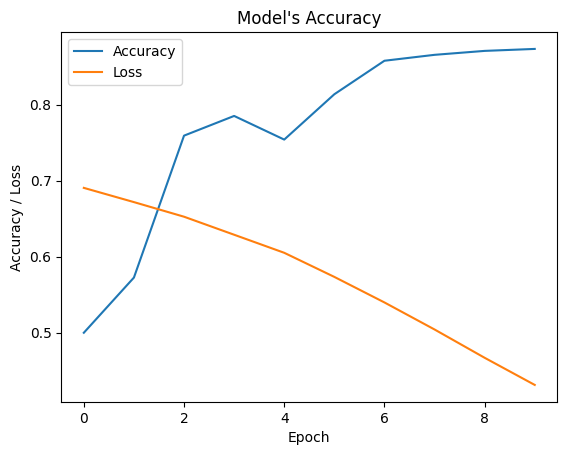

In [572]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model\'s Accuracy')
plt.legend(["Accuracy", "Loss"])
plt.ylabel('Accuracy / Loss')
plt.xlabel('Epoch')
plt.show()

In [573]:
print("Total positives in test : ",len(yTest[yTest==1]))
results = model.evaluate(tf.convert_to_tensor(xTest, dtype=tf.float32), tf.convert_to_tensor(yTest, dtype=tf.float32))
f1 = ((results[2]*results[3])/(results[2]+results[3]))*2
print("F1 Score : ", "{:.3f}".format(f1))

Total positives in test :  20
3/3 [==============================] - 0s 4ms/step - loss: 0.5483 - accuracy: 0.7826 - precision: 0.6316 - recall: 0.6000 - true_positives: 12.0000 - true_negatives: 42.0000 - false_positives: 7.0000 - false_negatives: 8.0000
F1 Score :  0.615


In [580]:
xgb = XGBClassifier(objective = "binary:hinge", eval_metric = "error", n_estimators = 300)
xgb.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              objective='binary:hinge', predictor=None, ...)

In [581]:
pred = xgb.predict(xTest)

In [582]:
cm = confusion_matrix(pred, yTest)
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
totalP = TP+FP
totalN = TN+FN
total = totalP+totalN

acc = (TP+TN)/(totalN+totalP)
acc*=100

p = TP/(TP+FP)
r = TP/(TP+FN)
f1 = (2*p*r)/(p+r)

print("Total : ", total, "\n")
print("True +ve :  ", TP, "     ", "{:.2f}".format((TP/totalP)*100), "%")
print("True -ve :  ", TN, "     " ,"{:.2f}".format((TN/totalN)*100), "%")
print("False +ve : ", FP, "      ", "{:.2f}".format((FP/totalP)*100), "%")
print("False -ve   ", FN, "      ", "{:.2f}".format((FN/totalN)*100), "%")
print("\n")
print("Accuracy :  ", "{:.2f}".format(acc), "%")
print("\n")
print("F1 Score :  ", "{:.2f}".format(f1), "%")


Total :  69 

True +ve :   43       87.76 %
True -ve :   10       50.00 %
False +ve :  6        12.24 %
False -ve    10        50.00 %


Accuracy :   76.81 %


F1 Score :   0.84 %


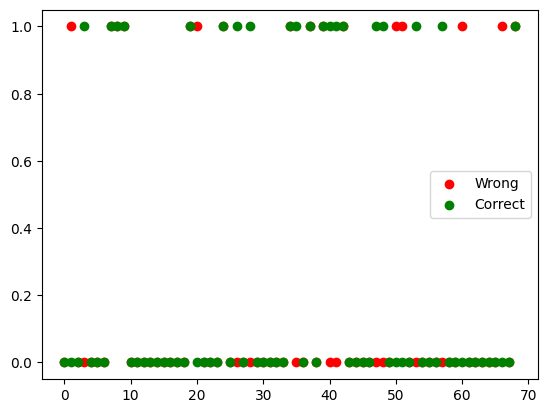

In [583]:
x = [x for x in range(len(xTest))]
plt.scatter(x, pred, color="red")
plt.scatter(x, yTest, color="green")
plt.legend(["Wrong", "Correct"])
plt.show()

In [584]:
df = shuffle(data, random_state=30)
X = df.drop(columns=["Output"])
y = df["Output"]

In [390]:
params = {
    "n_estimators" : [10, 20, 30],
    "max_depth" : [1, 2, 3, 4, 5, 6, 7],
    "learning_rate" : [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.3],
    "num_parallel_tree" : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    "reg_alpha" : [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0],
    "reg_lambda" : [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0]
}

# params = {
#     "n_estimators" : [10],
#     "max_depth" : [2, 3, 4],
#     "learning_rate" : [0.05, 0.06, 0.07, 0.08, 0.09],
#     "num_parallel_tree" : [3, 4, 5],
#     "reg_alpha" : [1.1, 1.2, 1.3, 1.4, 1.5],
#     "reg_lambda" : [1.5, 1.6, 1.7]
# }

# params = {
#     "n_estimators" : [500],
#     "max_depth" : [1, 5],
#     "learning_rate" : [0.03, 0.1],
#     "num_parallel_tree" : [5],
#     "reg_alpha" : [1.5],
#     "reg_lambda" : [1.9]
# }

In [391]:
gridXGB = RandomizedSearchCV(xgb, params, n_jobs=-1, scoring="f1", n_iter=50, cv=5)
gridXGB.fit(xTrain, yTrain)

RandomizedSearchCV(cv=5,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric='error',
                                           feature_types=None, gamma=None,
                                           gpu_id=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_r...
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n_estimators=500, n_jobs=None,
                                           num_parallel_tree=None,
                                           objective='binary:hinge',
                                           predictor=None, ...),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'learning_rate': [0.05, 0.06, 0.07,
                                                          0.08, 0.09, 0.1],
                                        'max_depth': [5, 7, 10],
                                        'n_estimators': [500],
                                        'num_parallel_tree': [5, 6, 7],
                                        'reg_alpha': [1.3, 1.4, 1.5],
                                        'reg_lambda': [1.3, 1.4, 1.5]},
                   scoring='f1')

In [445]:
bestParams = gridXGB.best_params_
bestParams

{'reg_lambda': 1.5,
 'reg_alpha': 1.5,
 'num_parallel_tree': 7,
 'n_estimators': 500,
 'max_depth': 10,
 'learning_rate': 0.09}

In [446]:
bestModel = gridXGB.best_estimator_
bestModel

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='error', feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.09, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=10, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=500, n_jobs=None, num_parallel_tree=7,
              objective='binary:hinge', predictor=None, ...)

In [447]:
yPred = bestModel.predict(xTest)

In [452]:
cm = confusion_matrix(yPred, yTest)
TP = cm[0][0]
FN = cm[0][1]
FP = cm[1][0]
TN = cm[1][1]
totalP = TP+FP
totalN = TN+FN
total = totalN + totalP

acc = (TP+TN)/(totalN+totalP)
acc*=100

p = TP/(TP+FP)
r = TP/(TP+FN)
f1 = (2*p*r)/(p+r)

print("Total : ", total, "\n")
print("True +ve :  ", TP, "     ", "{:.2f}".format((TP/totalP)*100), "%")
print("True -ve :  ", TN, "     " ,"{:.2f}".format((TN/totalN)*100), "%")
print("False +ve : ", FP, "      ", "{:.2f}".format((FP/totalP)*100), "%")
print("False -ve   ", FN, "      ", "{:.2f}".format((FN/totalN)*100), "%")
print("\n")
print("Accuracy :  ", "{:.2f}".format(acc), "%")
print("\n")
print("F1 Score :  ", "{:.2f}".format(f1))



Total :  69 

True +ve :   46       93.88 %
True -ve :   19       95.00 %
False +ve :  3        6.12 %
False -ve    1        5.00 %


Accuracy :   94.20 %


F1 Score :   0.96


In [451]:
bestModel.save_model("/home/aman/Documents/Tally/Git-Document-AI/Document-AI/Google'sRepresentationLearning/Models/XGBoostModel1")